[img_ddpg_version_1]: https://github.com/Brandon-HY-Lin/deep-reinforcement-learning/blob/master/p2_continuous-control/DDPG/pictures/ddpg_version_1.png "Score of Version 1"

[img_ddpg_version_2]: https://github.com/Brandon-HY-Lin/deep-reinforcement-learning/blob/master/p2_continuous-control/DDPG/pictures/ddpg_version_2.png "Score of Version 2"

[img_ddpg_version_3]: https://github.com/Brandon-HY-Lin/deep-reinforcement-learning/blob/master/p2_continuous-control/DDPG/pictures/ddpg_version_3.png "Score of Version 3"

[img_ddpg_version_4]: https://github.com/Brandon-HY-Lin/deep-reinforcement-learning/blob/master/p2_continuous-control/DDPG/pictures/ddpg_version_4.png "Score of Version 4"

[img_ddpg_version_5]: https://github.com/Brandon-HY-Lin/deep-reinforcement-learning/blob/master/p2_continuous-control/DDPG/pictures/ddpg_version_5.png "Score of Version 5"

[img_ddpg_version_6]: https://github.com/Brandon-HY-Lin/deep-reinforcement-learning/blob/master/p2_continuous-control/DDPG/pictures/ddpg_version_6.png "Score of Version 6"


[img_ddpg_version_5_and_version_6]: https://github.com/Brandon-HY-Lin/deep-reinforcement-learning/blob/master/p2_continuous-control/DDPG/pictures/ddpg_version_5_to_6_raw_data.png "Comparison between Version 5 and Version 6"

[img_ddpg_version_1_to_verion_6]: https://github.com/Brandon-HY-Lin/deep-reinforcement-learning/blob/master/p2_continuous-control/DDPG/pictures/ddpg_version_1_to_6.png "Comparison among version 1 to version 6"

[ounoise_sigma_02_theta_015]: https://github.com/Brandon-HY-Lin/deep-reinforcement-learning/blob/master/p2_continuous-control/DDPG/pictures/ounoise_mu_0_sigma_02_theta_015.png "OUnoise"




# Abstract
This work adopts [DDPG](https://arxiv.org/abs/1509.02971) with [prioritized experience replay (PER)](https://arxiv.org/abs/1511.05952) to play [Unity's Reacher game](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Learning-Environment-Examples.md#reacher) and achieves good results. The stability issue of reinforcement learning is greatly reduced by PER. This work achieve average score of 30.0 at episode 24. The final average scores at episode 400 is 38.8. 


# Introduction
In this project, the Unity's Reacher has been used as a testbed for DDPG algorithm. There are 20 agents in this environmet and +0.1 reward is given if agent's hand is in goal location. The maximum time step is 1,000. Hence the maximum total rewards should be +100. The sizes of observation space and action space are 33 and 4, respectively. Both spaces are continous. There are several techniques are applied including gradient clipping, batch normalization, and PER (importance sampling).


# Approches
Six versions are implemented in this work. The techniques used in early version are adopted in the later version which results incremented performances.


### Version 1:
Vanilla DDPG which updates every time step and lacks batch-normalization. The result enters plateau with value of 5. Although the score is very low, it still suffers from instability issue.

Parameters:
* learning rate for critic and actor are both 1e-3
* actor has 3 fully-connected neural networks with 1st layer size=400, 2nd layer size=300
* critic has 3-layer neural networks. 1st layer size=400 and 2nd layer size=300. The input 2nd layer is concatenated with action space.
* buffer size = 1e6
* exploration mu, sigma, and theta of OUNoise process is 0, 0.2, and 0.15

![Score of Version 1][img_ddpg_version_1]
The translucent line shows the raw score of every episode. The solid line shows the average score with window=100.


### Version 2: 
To solve the instability issue, gradient-clipping is applied as [Duan et al., 2016](https://arxiv.org/abs/1604.06778) suggests. The result shows that not only instability issue is gone, the score soars to 10. However, the score is still way below the criterion of +30.

Parameters:
* max_norm = 1.0     (by calling torch.clip_grad_norm_(, 1.0))

![Score of Version 2][img_ddpg_version_2]


### Version 3:
In the previous versions, agent learns every time step. This might be the cause of low score. In version 3, agent only learns every 20 time step. In each learning process, 10 random samples are performed. The result soon overshoots +30 criterion despite the raw data jitters.

![Score of Version 3][img_ddpg_version_3]

The translucent line shows the raw score of every episode. The solid line shows the average score with window=100. The average score exceed +30 at episode 212 and it reaches 35.76 at episode 400.


### Version 4:
By inspecting OUNoise, the random noise process keeps jitter upon time step and never decay. Whereas, [DQN](https://www.nature.com/articles/nature14236) exploits the decay property. As a result, version 4 decrease the value of noise every time step.

![OUNoise sigma=0.2 theta=0.15][ounoise_sigma_02_theta_015]

The above figure shows the noise generated by OUNoise with mu=0, sigma=0.2, and theta=0.15


Parameters:
* epsilon_start = 1.0
* epsilon_decay = 1e-6 
* Note: (epsilon_start = epsilon_start - epsilon_decay) on every time step.

![Score of Version 4][img_ddpg_version_4]

The average score exceed +30 at episode 135 and it reaches 37.07 at episode 400 which is greater than version 3 by 1.3 point. Note that it speeds up the convergence. 


### Version 5:
Apply batch normalization to 1st layer of critic and actor neural networks.

![Score of Version 5][img_ddpg_version_5]

The average score exceed +30 at episode 60 and it reaches 37.77 at episode 400 which is almost the same with version 4. However, it further speeds up the convergence. 


### Version 6:
According to [D4PG](https://arxiv.org/pdf/1804.08617.pdf), replacing random experience buffer with PER (prioritized experience buffer) can boost the performance of DDPG. This version implement PER and add importance sampling to critic function (Q-function)

![Score of Version 6][img_ddpg_version_6]

The average score exceed +30 at episode 24 and it reaches 38.8 at episode 400 which is +1.1 higher than version 5.


When taking a close look at version 5 and version 6 as shown below, version 6 jitters less than version 5. It may conclude that PER can increase the stability.

![Comparison between version 5 and version 6][img_ddpg_version_5_and_version_6]



# Results

The results of 6 versions are shown below. The version 6 combined all the approches among version 2 and version 5, and thus achieve the best result in score and stability. 

![Comparison of 6 versions][img_ddpg_version_1_to_verion_6]

The approches applied by version 6 are summarized as below:

1. Apply gradient clipping.
2. Train the netural networks 10 times for every 20 time steps.
3. Decrease the noise for every time step.
3. Apply batch normalization.
4. Replace random experience replay by PER.


# Conclusion
In this work, several techniques are adopted into DDPG algorithm including batch normalization and PER. The average score is 38.80 at episode 400. The convergence speed is fast and can achieve average reward of +30 at episode 24. The instability issue are insignificant compared to other versions in this project.


# Future Work.
* Implement [D4PG (Distributed Distributional Deterministic Policy Gradients)](https://arxiv.org/pdf/1804.08617.pdf)

# Results

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


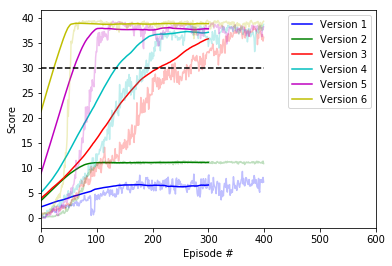

In [16]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

from utils import utils
from utils.utils import ScoreParcels

score_parcels = [ScoreParcels('Version 1', './logs/log_DDPG_using_v5_params.pickle', 'b'),
                ScoreParcels('Version 2', './logs/log_DDPG_version_2.pickle', 'g'),
                ScoreParcels('Version 3', './logs/log_DDPG_version_3_combined.pickle', 'r'),
                ScoreParcels('Version 4', './logs/log_DDPG_version_4.pickle', 'c'),
                ScoreParcels('Version 5', './logs/log_DDPG_version_5.pickle', 'm'),
                ScoreParcels('Version 6', './logs/log_DDPG_version_6.pickle', 'y'),]

utils.plot_scores_v2(score_parcels, 
                  size_window=100,
                 max_len=400,
                 show_origin=True)

### Close Look at Version 3 ~ Version 6

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


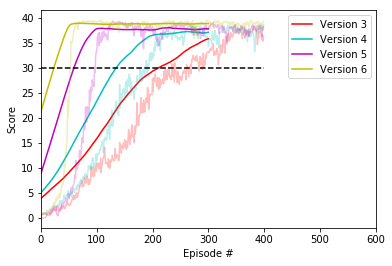

In [21]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

from utils import utils
from utils.utils import ScoreParcels

score_parcels = [ScoreParcels('Version 3', './logs/log_DDPG_version_3_combined.pickle', 'r'),
                ScoreParcels('Version 4', './logs/log_DDPG_version_4.pickle', 'c'),
                ScoreParcels('Version 5', './logs/log_DDPG_version_5.pickle', 'm'),
                ScoreParcels('Version 6', './logs/log_DDPG_version_6.pickle', 'y'),]

utils.plot_scores_v2(score_parcels, 
                  size_window=100,
                 max_len=400,
                 show_origin=True)

### Close Look at Version 5 ~ Version 6

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


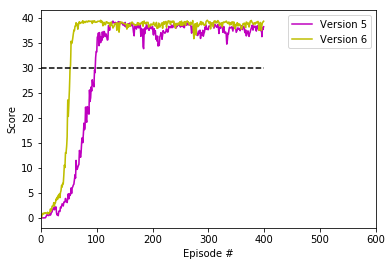

In [22]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

from utils import utils
from utils.utils import ScoreParcels

score_parcels = [ScoreParcels('Version 5', './logs/log_DDPG_version_5.pickle', 'm'),
                ScoreParcels('Version 6', './logs/log_DDPG_version_6.pickle', 'y'),]

utils.plot_scores_v2(score_parcels, 
                  size_window=1,
                 max_len=400,
                 show_origin=True,
                 draw_vertical=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


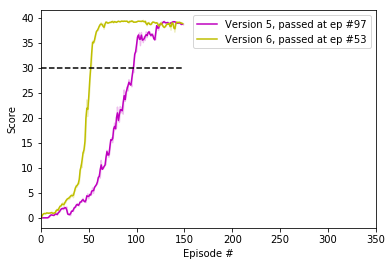

In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

from utils import utils
from utils.utils import ScoreParcels

score_parcels = [ScoreParcels('Version 5', './logs/log_DDPG_version_5.pickle', 'm'),
                ScoreParcels('Version 6', './logs/log_DDPG_version_6.pickle', 'y'),]

utils.plot_scores_v2(score_parcels, 
                  size_window=2,
                 max_len=150,
                 show_origin=True,
                 draw_vertical=False,
                    show_episode_on_label=True)